# <font color='00BFEB'> Topic Modelling Of BBC News Articles | NMF With Sklearn. </font>  <br/>
 <font color='#fd79a8'> Aim: Get only <font color='#ffdd59'>UK political theme and Goveranance News  </font>  <br> Non-Matrix Factorization<br> Unsupervised text Classification

In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud   #for visualizations
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
from google.colab import files
upload = files.upload()

Saving BBC_08_APR_17_to_08_JUN_2017.csv to BBC_08_APR_17_to_08_JUN_2017.csv


In [ ]:
bbc = pd.read_csv('BBC_08_APR_17_to_08_JUN_2017.csv')

In [ ]:
bbc.head()

,article,date,panda_date,headline,summary,url
0,Syria war: US warns of 'more' after missile st...,Saturday 08 April 2017,8-Apr-17,US warns Syria it's ready for 'more',Its ambassador to the UN says America will not...,http://www.bbc.com/news/world-middle-east-3952...
1,"Stockholm lorry rams crowds, killing 'at least...",Saturday 08 April 2017,8-Apr-17,Deaths as lorry rams Swedish store,At least four people are reported killed in a ...,http://www.bbc.com/news/world-europe-39531108
2,DR Congo: Bruno Tshibala appointed new prime m...,Saturday 08 April 2017,8-Apr-17,New PM Tshibala appointed in DR Congo,The appointment is likely further divide oppon...,http://www.bbc.com/news/world-africa-39536132
3,Norway to build landmark ship tunnel Norway is...,Saturday 08 April 2017,8-Apr-17,Norway to build landmark ship tunnel,The country is taking radical steps to try and...,http://www.bbc.com/news/world-europe-39521570
4,Trump to make China visit after hosting Xi for...,Saturday 08 April 2017,8-Apr-17,Trump to make China state visit,Mr Trump accepts the Chinese President Xi Jinp...,http://www.bbc.com/news/world-us-canada-39535828


In [ ]:
bbc['headline'][102]

'Girl narrowly escapes barbershop gunfire'

 <font color='#fd79a8'> Result: Average number of words per headline <font color='#ffdd59'>apply-lambda  </font><br>create a column which contains no of words<br>
Use apply-lambda to create the logic needed. <br>Lambda functions consist of three parts: <br> Keyword | Bound variable/argument | Body or expression<br>
<font color='#ffdd59'>lambda x:x

In [ ]:
#to get an idea of avg how long each headline is
#avg no of words per headline

bbc['word_titles'] = bbc['headline'].apply(lambda x:len(x.split()))

In [ ]:
bbc.describe()

,word_titles
count,988.000000
mean,6.167004
std,1.028196
min,3.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,10.000000


Text(0.5, 1.0, 'Distribution of no of words in the BBC News Headlines')

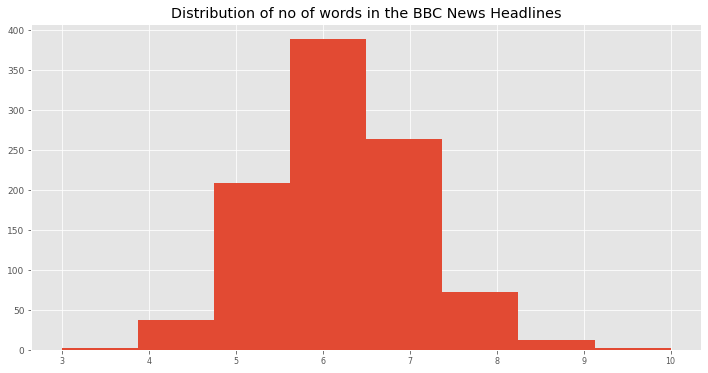

In [ ]:
bbc[['word_titles']].hist(figsize=(12,6),bins=8,xlabelsize=8,ylabelsize=9)
plt.title('Distribution of no of words in the BBC News Headlines')

 <font color='#fd79a8'>We can see that most of the headlines have around 4-6 words. Show the frequent used words in headlines. 

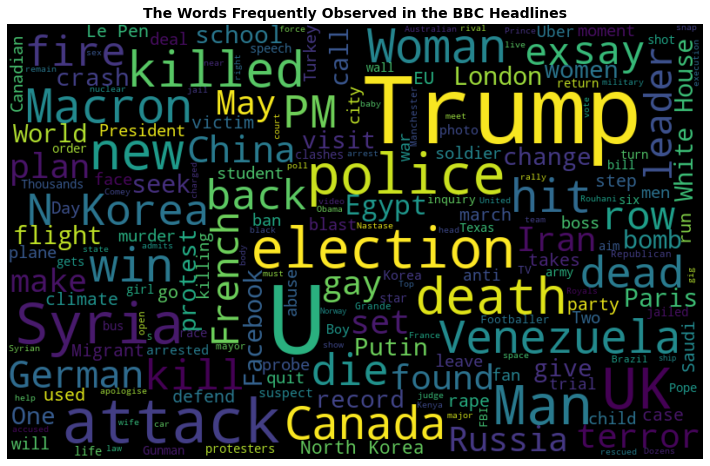

In [ ]:
#we can do this to find trending topics and what not
all_words = " ".join([word for word in bbc['headline'][0:10000]])
all_words
wordcloud = WordCloud(width=800,height=500,random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.title("The Words Frequently Observed in the BBC Headlines",weight="bold",fontsize=14)
plt.show()

Let's Pre-Process some of our information

 <font color='00BFEB'> TF-IDF is a BoW method ( to determine how relevant those words are to a given document.)<br>
<font color='pink'> NMF </font>is a dimensional reduction method and effective for document clustering, because a term-document matrix is high-dimensional and sparse. The initial matrix of the NMF algorithm is regarded as a clustering result, therefore we can use NMF as a refinement method. <br>
  NMF can use tf-IDF. LDA can only use raw term counts for LDA as it is a probablistic graphical model. <br>
  min_df: float in range [0.0, 1.0] or int, default=1<br>max_df: float in range [0.0, 1.0] or int, default=1.0<br> 
  The headlines need to be proprocessed before they can be put into DTM

In [ ]:
#for nml we are going to our vectorizing using tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df = 0.92, min_df = 2, stop_words = 'english')

 <font color='00BFEB'> Create the DTM - document term matrix<br>basically a matrix, with documents designated by rows and words by columns<br>dtm is constructed with TFIDF scores as entries so that words that are common across all the articles are down-weighted

In [ ]:
dtm = vectorizer.fit_transform(bbc['article'].values.astype('U'))
dtm

<988x12545 sparse matrix of type '<class 'numpy.float64'>'
	with 156988 stored elements in Compressed Sparse Row format>

 <font color='00BFEB'>The astype(‘U’) is telling numpy to convert the data to Unicode (essentially a string in python 3).<br> [Click Here for more info on dtype ](https://numpy.org/devdocs/reference/arrays.dtypes.html)

 <font color='00BFEB'>NumPy is used to work with arrays. The array object in NumPy is called ndarray.<br>We can create a NumPy ndarray object by using the array() function.<br>we can pass a list or array-like object into the array() method, and it will be converted into an ndarray<br>To obtain the number of items identified by the dtm function. <br>Returns a list of feature names, ordered by their indices.<br>len - number of items in an object.

In [ ]:
words = np.array(vectorizer.get_feature_names())
print(len(words))

12545


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### <font color='#ffdd59'> Non-Matrix Factorization NMF  

<font color='#ffdd59'>SKLEARN is used for NMF; Next lecture - Gensim used for LDA

In [ ]:
from sklearn.decomposition import NMF
import random

 <font color='#fd79a8'>Estimate the NMF topic model on the corpus of BBC headlines. Pick the number of topics. <br>NMF components are topics<br>The first line below constructs an NMF model using the function “NMF.” The first input to the function is the<font color='b'> number of topics </font> which is set to “n_components=___.”<br> The second input sets the seed for random number generators so that the function will yield the same results every time it is executed.

In [ ]:
nmf_model = NMF(n_components = 15, random_state=23)
nmf_model.fit(dtm)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=15, random_state=23)

 <font color='#fd79a8'>verbose = 0 | an option for producing detailed logging information. You should be aware, and will probably notice if you enable verbose > 0, that printing to the screen is generally a very slow process.<br>max_iter defaults to 200 - maximum number of iterations | <br>Alpha: Constant that multiplies the regularization terms. Set it to zero to have no regularization.<br>Frobenius Norm; beta_loss is set to this as default - discuss the mathematics of Frobenius Norm later in this chapter. 

 <font color='#fd79a8'>#NMF gives values with the highest coefficient, not probabiltiy like with LDA

In [ ]:
for index, topic in enumerate(nmf_model.components_):
  print(f'The Top 10 words for Topic#{index}')
  print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])

The Top 10 words for Topic#0
['family', 'ms', 'woman', 'murder', 'mr', 'man', 'death', 'court', 'said', 'police']
The Top 10 words for Topic#1
['test', 'kim', 'china', 'pyongyang', 'south', 'nuclear', 'korean', 'missile', 'north', 'korea']
The Top 10 words for Topic#2


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['investigation', 'russian', 'white', 'president', 'house', 'russia', 'fbi', 'trump', 'mr', 'comey']
The Top 10 words for Topic#3
['election', 'ms', 'emmanuel', 'marine', 'mr', 'french', 'france', 'pen', 'le', 'macron']
The Top 10 words for Topic#4
['said', 'iran', 'rebel', 'assad', 'attack', 'zones', 'russia', 'chemical', 'syrian', 'syria']
The Top 10 words for Topic#5
['protesters', 'president', 'government', 'venezuelan', 'capriles', 'caracas', 'protests', 'opposition', 'venezuela', 'maduro']
The Top 10 words for Topic#6
['arabia', 'donald', 'white', 'house', 'saudi', 'paris', 'climate', 'mr', 'president', 'trump']
The Top 10 words for Topic#7
['uk', 'bbc', 'people', 'london', 'grande', 'concert', 'abedi', 'police', 'attack', 'manchester']
The Top 10 words for Topic#8
['vote', 'uk', 'theresa', 'mrs', 'said', 'labour', 'eu', 'election', 'brexit', 'party']
The Top 10 words for Topic#9
['audio', 'cunha', 'president', 'rousseff', 'brazilian', 'batista', 'mr', 'corruption', 'brazil', 'te

 <font color='#fd79a8'>With the estimated model, we check the top 10 most likely words in each topic with .components<br>The <font color='#ffdd59'>components_</font> attribute of the estimated model is a topic-by-word matrix with each entry denoting the weight of the corresponding word in the corresponding topic. We then go through this topic-by-word matrix row by row and print out the 10 most likely words for each row. Note that the words are printed out in increasing order of their weights.

 <font color='#fd79a8'>Combine topics with original data..transform() on vectorized articles to attach a label number. Latent themes are observed. 

In [ ]:
bbc_topics = nmf_model.transform(dtm)

 <font color='#fd79a8'>argmax is a function which gives the index of the greatest number in the given row or column and the row or column can be decided using axis attribute of argmax funcion. 

<font color='#fd79a8'>argsort - sort in ascending order

In [ ]:
bbc_topics[1].argsort()

array([3, 6, 9, 1, 4, 2, 5, 8, 0, 7])

In [ ]:
#gives index position of most representative topic
bbc_topics[1].argmax()

7

In [ ]:
#gives index position of least representative topic
bbc_topics[1].argmin()

3

 <font color='#fd79a8'>If we give axis=0 then it will give the index from columns and if we give axis=1 then it will give the index from rows.<br>
 
  To find the topic index with maximum value, we can call the argmax() method and pass 1 as the value for the axis parameter.<br>


In [ ]:
bbc_topiclabels = {0: 'Crime Victims & Public Safety',
                   1: 'Foreign Defence: North Korea',
                   2: 'US Politics',
                   3: 'Europe French Politics',
                   4: 'International Relations: War & Conflict',
                   5: 'Venezuela Election Protest',
                   6: 'US Foreign Policy',
                   7: 'UK Security & Terrorism',
                   8: 'UK Politics: Brexit',
                   9: 'Latin American Politics',
                   10: 'Sports',
                   11: 'Afghanistan',
                   12: ' ',
                   13: 'Egypt',
                   14: 'Turkey'
                    }

In [ ]:
bbc['title'] = bbc_topics.argmax(axis=1)

<font color='00BFEB'>The following script adds a new column for topic in the data frame and assigns the topic value to each row in the column:

In [ ]:
bbc['topic_label'] = bbc['title'].map(bbc_topiclabels)

In [ ]:
bbc2 = bbc.groupby('title').count()
bbc.head()

,article,date,panda_date,headline,summary,url,word_titles,title,topic_label
0,Syria war: US warns of 'more' after missile st...,Saturday 08 April 2017,8-Apr-17,US warns Syria it's ready for 'more',Its ambassador to the UN says America will not...,http://www.bbc.com/news/world-middle-east-3952...,7,4,International Relations: War & Conflict
1,"Stockholm lorry rams crowds, killing 'at least...",Saturday 08 April 2017,8-Apr-17,Deaths as lorry rams Swedish store,At least four people are reported killed in a ...,http://www.bbc.com/news/world-europe-39531108,6,7,UK Security & Terrorism
2,DR Congo: Bruno Tshibala appointed new prime m...,Saturday 08 April 2017,8-Apr-17,New PM Tshibala appointed in DR Congo,The appointment is likely further divide oppon...,http://www.bbc.com/news/world-africa-39536132,7,5,Venezuela Election Protest
3,Norway to build landmark ship tunnel Norway is...,Saturday 08 April 2017,8-Apr-17,Norway to build landmark ship tunnel,The country is taking radical steps to try and...,http://www.bbc.com/news/world-europe-39521570,6,0,Crime Victims & Public Safety
4,Trump to make China visit after hosting Xi for...,Saturday 08 April 2017,8-Apr-17,Trump to make China state visit,Mr Trump accepts the Chinese President Xi Jinp...,http://www.bbc.com/news/world-us-canada-39535828,6,6,US Foreign Policy


In [ ]:
bbc2

,article,date,panda_date,headline,summary,url,word_titles,topic_label
title,,,,,,,,
0,386,386,386,386,386,386,386,386
1,35,35,35,35,35,35,35,35
2,56,56,56,56,56,56,56,56
3,28,28,28,28,28,28,28,28
4,109,109,109,109,109,109,109,109
5,38,38,38,38,38,38,38,38
6,124,124,124,124,124,124,124,124
7,125,125,125,125,125,125,125,125
8,71,71,71,71,71,71,71,71


filtering to get only UK topics

In [ ]:
bbc_UKtopics = bbc.loc[bbc['title'].isin([0,3,7,8])]
bbc_UKtopics.head()

,article,date,panda_date,headline,summary,url,word_titles,title,topic_label
1,"Stockholm lorry rams crowds, killing 'at least...",Saturday 08 April 2017,8-Apr-17,Deaths as lorry rams Swedish store,At least four people are reported killed in a ...,http://www.bbc.com/news/world-europe-39531108,6,7,UK Security & Terrorism
3,Norway to build landmark ship tunnel Norway is...,Saturday 08 April 2017,8-Apr-17,Norway to build landmark ship tunnel,The country is taking radical steps to try and...,http://www.bbc.com/news/world-europe-39521570,6,0,Crime Victims & Public Safety
5,British Columbia ends high heel dress code req...,Saturday 08 April 2017,8-Apr-17,Canada province makes high heels optional,Employers in British Colombia will no longer b...,http://www.bbc.com/news/world-us-canada-39536117,6,8,UK Politics: Brexit
6,Uber: We did not steal Google's self-driving t...,Saturday 08 April 2017,8-Apr-17,Uber: We did not steal Google's tech,The ride-sharing company denies it used ideas ...,http://www.bbc.com/news/technology-39536347,7,0,Crime Victims & Public Safety
7,Westminster Bridge attack victim Andreea Crist...,Saturday 08 April 2017,8-Apr-17,Woman injured in Westminster attack dies,"Romanian woman Andreea Cristea, who fell into ...",http://www.bbc.com/news/uk-39525596,6,7,UK Security & Terrorism


 <font color='#fd79a8'>Wordcloud

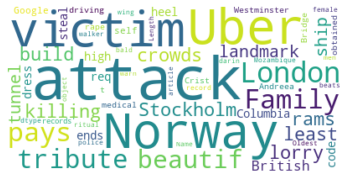

In [ ]:
text = str(bbc_UKtopics.article)
wordcloud = WordCloud().generate(text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=70,max_words=60,background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()